# Simple MNIST Neural Network

In [1]:
# import required modules
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import struct
from fxpmath import Fxp

2024-12-16 11:37:13.042280: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 11:37:13.046038: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 11:37:13.055637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734345433.073173    9647 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734345433.079098    9647 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-16 11:37:13.097803: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

## Import MNIST dataset

1. Import MNIST dataset
2. Convert labels to one-hot encoding
3. Flattern (reshape) and normalize images

In [2]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Reshape input to flat vector
train_images = np.reshape(train_images, [-1, 28*28])
test_images = np.reshape(test_images, [-1, 28*28])

# Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

## Create model

1. Define model parameters
2. Define model architecture
3. Compile the model


In [4]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [5]:
# Define the model architecture
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_dim=28*28, use_bias=False),
  tf.keras.layers.Dropout(dropout),
])

model.summary()

/home/wiebren/school/final_project/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-16 11:37:16.748847: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,840 (30.62 KB)

 Trainable params: 7,840 (30.62 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

## Train and validate the model

In [7]:
model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=batch_size,
    validation_data=(test_images, test_labels)
)

Epoch 1/20


2024-12-16 11:37:16.856421: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4712 - loss: 1.4857 - val_accuracy: 0.8985 - val_loss: 0.5090
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5740 - loss: 1.0862 - val_accuracy: 0.9084 - val_loss: 0.4179
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5839 - loss: 1.0512 - val_accuracy: 0.9143 - val_loss: 0.3838
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5877 - loss: 1.0290 - val_accuracy: 0.9156 - val_loss: 0.3632
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5923 - loss: 1.0232 - val_accuracy: 0.9165 - val_loss: 0.3571
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5936 - loss: 1.0112 - val_accuracy: 0.9170 - val_loss: 0.3457
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5938 - loss: 1.0134 - val_accuracy: 0.9175 - val_loss: 0.3372
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5946 - loss: 1.0051 - val_accuracy: 0.9186 - val_

# Manual inference calculation

Tensorflow inference:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[ -4.8060937  -12.769396    -4.960964    -0.73131126  -5.6130304
  -3.4489174   -9.644726     3.5483387   -3.149226    -2.1756184 ] = 7
Manual inference:
[ -4.806094   -12.769396    -4.960964    -0.73131126  -5.6130314
  -3.4489176   -9.644726     3.548339    -3.1492262   -2.1756182 ] = 7
Equality check:
[ 4.7683716e-07  0.0000000e+00  0.0000000e+00  0.0000000e+00
  9.5367432e-07  2.3841858e-07  0.0000000e+00 -2.3841858e-07
  2.3841858e-07 -2.3841858e-07]


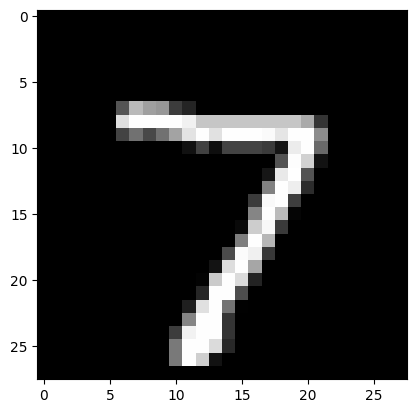

In [8]:
image = test_images[0]

plt.imshow(np.reshape(image, (28, 28)), "gray")

print("Tensorflow inference:")
prediction = model.predict(np.array([image, ]))[0]
print(f"{prediction} = {prediction.argmax()}")

weights = np.array(model.weights[0])
outputs = np.zeros(10, np.float32)

for i in range(10):  # loop over neurons
    for j in range(784):  # loop over input feature = image
        outputs[i] += image[j] * weights[j, i]

print("Manual inference:")
print(f"{outputs} = {outputs.argmax()}")

print("Equality check:")
print(prediction - outputs)

# Save model

## Write model weights to c header

Writes the weights of the dense layers to a c header file like below

```c
double model_weights[][COLS] = {{0.5564, ..., 0.8794},
                                :
                                {0.7546, ..., 0.4868}};
```

In [9]:
filename = "neural_network.h"

headerfile = open(filename, "w")

kernel_weights = np.array(model.weights[0])

headerfile.write(f"const float model_weights[][{kernel_weights.shape[1]}] = {{")
for i in range(kernel_weights.shape[0] - 1):
    headerfile.write("{")
    for j in range(kernel_weights.shape[1] - 1):
        headerfile.write(f"{kernel_weights[i, j]}, ")
    headerfile.write(f"{kernel_weights[i, -1]}}},\r\n")
    headerfile.write((34 + len(str(kernel_weights.shape[1])))*' ')
headerfile.write("{")
for j in range(kernel_weights.shape[1] - 1):
    headerfile.write(f"{kernel_weights[i, j]}, ")
headerfile.write(f"{kernel_weights[i, -1]}}}")
headerfile.write("};\r\n")

headerfile.close()

## Write image to c header

Writes a selected image flaterned to a c header file like below

```c
double image[] = {0.5564, ..., 0.8794};
```

In [10]:
filename = "image.h"

headerfile = open(filename, "w")

headerfile.write("const float image[] = {")
for i in range(image.shape[0] - 1):
    headerfile.write(f"{image[i]}, ")
headerfile.write(f"{image[-1]}}};\r\n")

headerfile.close()

## Write image and model weights to VHDL initialization file

Writes selected image and model weights to VHDL file like below

```vhdl
-- Generated DMEM image with image and model weights
-- Image start address = 0xXXXXXXXX
-- Model weights start address = 0xXXXXXXXX

package body neorv32_dmem_image is

constant mem_ram_b0_init : mem8_t := (
x"AA",
  :
x"00"
);

constant mem_ram_b1_init : mem8_t := (
x"BB",
  :
x"00"
);

constant mem_ram_b2_init : mem8_t := (
x"CC",
  :
x"00"
);

constant mem_ram_b3_init : mem8_t := (
x"DD",
  :
x"00"
);

end neorv32_dmem_image;

```

In [11]:
def float_as_int(f):
    return struct.unpack('I', struct.pack('f', f))[0]

In [12]:
filename = "neorv32_dmem_image_float.vhd"
starting_address = 0x80000400

file = open(filename, "w")

# write header
file.write("-- Generated DMEM image with image and model weights\n")
file.write(f"-- Image at [0x{starting_address:0>8x}, 0x{(starting_address + 784*4 - 1):0>8x}]\n")
file.write(f"-- Model weights at [0x{(starting_address + 784*4):0>8x}, 0x{(starting_address + 784*4 + 10*784*4 - 1):0>8x}]\n")
file.write("\n")
file.write("package body neorv32_dmem_image is\n")

for ram_i in range(4):
    file.write("\n")
    file.write(f"constant mem_ram_b{ram_i}_init : mem8_t := (\n")

    # write 0s up until starting address
    for i in range(int((starting_address - 0x80000000) / 4)):
        file.write("x\"00\",\n")

    # write image
    for i in range(image.shape[0]):
        file.write(f"x\"{((float_as_int(image[i]) >> (ram_i * 8)) & 0xFF):0>2x}\",\n")

    # write model weights
    for i in range(weights.shape[0] - 1):
        for j in range(weights.shape[1]):
            file.write(f"x\"{((float_as_int(weights[i, j]) >> (ram_i * 8)) & 0xFF):0>2x}\",\n")
    for j in range(weights.shape[1] - 1):
        file.write(f"x\"{((float_as_int(weights[-1, j]) >> (ram_i * 8)) & 0xFF):0>2x}\",\n")
    file.write(f"x\"{((float_as_int(weights[-1, -1]) >> (ram_i * 8)) & 0xFF):0>2x}\"\n")

    file.write(");\n")

# write footer
file.write("\n")
file.write("end neorv32_dmem_image;\n")

file.close()

## Write output to txt file for verification

```
[0xXXXXXXXX, 0xXXXXXXXX, 0xXXXXXXXX, 0xXXXXXXXX, 0xXXXXXXXX, 0xXXXXXXXX, 0xXXXXXXXX, 0xXXXXXXXX, 0xXXXXXXXX, 0xXXXXXXXX]
```

In [13]:
filename = "verification_float.out"

file = open(filename, "w")

file.write("[")
for i in range(9):
    file.write(f"0x{float_as_int(outputs[i]):0>8x}, ")
file.write(f"0x{float_as_int(outputs[9]):0>8x}]\n")

file.close()

# Fixed point

## Convert model to fixed point and calculate accuracy

used fxpmath python module for this

In [14]:
fxp_ref = Fxp(None, dtype='fxp-s16/7') # 16 bit = 1 sign bit, 8 integer, and 7 fractional

fxp_weights = Fxp(weights, like=fxp_ref)
fxp_outputs = Fxp(np.zeros(10), like=fxp_ref)

correct = 0
for image, label in zip(test_images, test_labels):
    fxp_image = Fxp(image, like=fxp_ref)

    raw_outputs = fxp_weights.val.T.dot(fxp_image.val) >> 7
    fxp_outputs.set_val(raw_outputs, raw=True)

    fxp_label = fxp_outputs.argmax()
    correct += fxp_label == label

fxp_accuracy = correct / len(test_images)
print(f"fxp acc = {fxp_accuracy}")

fxp acc = 0.9216


In [15]:
fxp_image = Fxp(test_images[0], like=fxp_ref)

raw_outputs = fxp_weights.val.T.dot(fxp_image.val) >> 7
fxp_outputs.set_val(raw_outputs, raw=True)

print(f"fxp inference:")
print(f"{fxp_outputs} = {fxp_outputs.argmax()}")

fxp inference:
[ -4.7578125 -12.5234375  -4.8828125  -0.7578125  -5.4609375  -3.390625
  -9.3984375   3.4453125  -3.09375    -2.1171875] = 7


## Write fixed point image and model weights to VHDL initialization file

Writes selected image and model weights in fixed point to VHDL file like below

```vhdl
-- Generated DMEM image with image and model weights
-- Image start address = 0xXXXXXXXX
-- Model weights start address = 0xXXXXXXXX

package body neorv32_dmem_image is

constant mem_ram_b0_init : mem8_t := (
x"AA",
  :
x"00"
);

constant mem_ram_b1_init : mem8_t := (
x"BB",
  :
x"00"
);

constant mem_ram_b2_init : mem8_t := (
x"CC",
  :
x"00"
);

constant mem_ram_b3_init : mem8_t := (
x"DD",
  :
x"00"
);

end neorv32_dmem_image;

```

In [16]:
filename = "neorv32_dmem_image_fxp.vhd"
starting_address = 0x80000400

file = open(filename, "w")

# write header
file.write("-- Generated DMEM image with fixed point image and model weights\n")
file.write(f"-- Image at [0x{starting_address:0>8x}, 0x{(starting_address + 784*4 - 1):0>8x}]\n")
file.write(f"-- Model weights at [0x{(starting_address + 784*4):0>8x}, 0x{(starting_address + 784*4 + 10*784*4 - 1):0>8x}]\n")
file.write("\n")
file.write("package body neorv32_dmem_image is\n")

for ram_i in range(4):
    file.write("\n")
    file.write(f"constant mem_ram_b{ram_i}_init : mem8_t := (\n")

    # write 0s up until starting address
    for i in range(int((starting_address - 0x80000000) / 4)):
        file.write("x\"00\",\n")

    # write fxp image
    for i in range(fxp_image.shape[0]):
        file.write(f"x\"{((fxp_image[i].val >> (ram_i * 8)) & 0xFF):0>2x}\",\n")

    # write fxp model weights
    for i in range(fxp_weights.shape[0] - 1):
        for j in range(fxp_weights.shape[1]):
            file.write(f"x\"{((fxp_weights[i, j].val >> (ram_i * 8)) & 0xFF):0>2x}\",\n")
    for j in range(fxp_weights.shape[1] - 1):
        file.write(f"x\"{((fxp_weights[-1, j].val >> (ram_i * 8)) & 0xFF):0>2x}\",\n")
    file.write(f"x\"{((fxp_weights[-1, -1].val >> (ram_i * 8)) & 0xFF):0>2x}\"\n")

    file.write(");\n")

# write footer
file.write("\n")
file.write("end neorv32_dmem_image;\n")

file.close()

## Write output to txt file for verification

```
[0xXXXXXXXX, 0xXXXXXXXX, 0xXXXXXXXX, 0xXXXXXXXX, 0xXXXXXXXX, 0xXXXXXXXX, 0xXXXXXXXX, 0xXXXXXXXX, 0xXXXXXXXX, 0xXXXXXXXX]
```

In [17]:
def int_as_uint(i):
    return struct.unpack('I', struct.pack('i', i))[0]

In [18]:
filename = "verification_fxp.out"

file = open(filename, "w")

file.write("[")
for i in range(9):
    file.write(f"0x{int_as_uint(fxp_outputs[i].val):0>8x}, ")
file.write(f"0x{int_as_uint(fxp_outputs[9].val):0>8x}]\n")

file.close()

# Quantize model

In [ ]:
def representative_data_gen():
    for input_value in tf.data.Dataset.from_tensor_slices(train_images).batch(1).take(100):
        yield [input_value]


converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to int8
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

tflite_quant_model = converter.convert()

In [ ]:
tf.lite.experimental.Analyzer.analyze(model_content=tflite_quant_model)

In [ ]:
interpreter = tf.lite.Interpreter(model_content=tflite_quant_model, experimental_preserve_all_tensors=True)
interpreter.allocate_tensors()

In [ ]:
test_image = image

plt.imshow(np.reshape(test_image, (28, 28)), "gray")

input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

input_scale, input_zero_point = input_details["quantization"]
test_image = test_image / input_scale + input_zero_point

test_image = np.expand_dims(test_image, axis=0).astype(input_details["dtype"])
interpreter.set_tensor(input_details["index"], test_image)
interpreter.invoke()
output = interpreter.get_tensor(output_details["index"])[0]
output_scale, output_zero_point = output_details["quantization"]
output_dequant = output_scale * (output - output_zero_point).astype(np.float32)

print("Tensorflow lite inference:")
print(output, f"= {output.argmax()}")
print(output_dequant, f"= {output_dequant.argmax()}")

In [ ]:
print(interpreter.get_tensor(5))

In [ ]:
def quantized_matmul_and_add(input_data, weights, biases, input_scale,
                             input_zero_point, weight_scale, weight_zero_point,
                             bias_scale, output_scale, output_zero_point):
    # Perform integer matrix multiplication
    # Note: We assume weights and inputs are in int8 format
    # Convert inputs and weights to int32 for safe multiplication
    input_data = input_data.astype(np.int32)
    weights = weights.astype(np.int32)

    # Calculate the scale factor for the result of the matrix multiplication
    scale_factor = (input_scale * weight_scale) / output_scale

    # Perform the matrix multiplication
    result = np.dot(input_data - input_zero_point, (weights - weight_zero_point).T)

    # Adjust result by scale factor
    result = result * scale_factor

    # Add biases (converted to int32 for safe addition)
    result += biases * (bias_scale / output_scale)

    # Add output_zero_point
    result += output_zero_point

    # Clip to int8 range
    result = np.clip(result, -128, 127).astype(np.int8)

    return result


# Example usage with dummy data
# Assuming 'image' is your input image in int8 format
quantized_image = test_image[0]

# Dummy weights and biases for demonstration purposes
weights_1 = interpreter.get_tensor(4)
biases_1 = interpreter.get_tensor(3)

weights_2 = interpreter.get_tensor(2)
biases_2 = interpreter.get_tensor(1)

# Quantization parameters from your model description
(input_scale_1, input_zero_point_1) = interpreter.get_tensor_details()[0]["quantization"]
# input_scale_1 = 0.003921568859368563
# input_zero_point_1 = -128

(weight_scale_1, weight_zero_point_1) = interpreter.get_tensor_details()[4]["quantization"]
# weight_scale_1 = 0.007190252188593149
# weight_zero_point_1 = 0

(_, bias_scale_1) = interpreter.get_tensor_details()[3]["quantization"]
# bias_scale_1 = 2.8197069696034305e-05

(output_scale_1, output_zero_point_1) = interpreter.get_tensor_details()[5]["quantization"]
# output_scale_1 = 0.028666598722338676
# output_zero_point_1 = -128

# Layer 1 inference in quantized domain
layer_1_output = quantized_matmul_and_add(
    quantized_image,
    weights_1,
    biases_1,
    input_scale_1,
    input_zero_point_1,
    weight_scale_1,
    weight_zero_point_1,
    bias_scale_1,
    output_scale_1,
    output_zero_point_1
)

# Apply ReLU in quantized domain (clip negative values to zero)
layer_1_output[layer_1_output < output_zero_point_1] = output_zero_point_1

print(layer_1_output)

In [ ]:
# Quantization parameters for Layer 2
input_scale_2 = output_scale_1
input_zero_point_2 = output_zero_point_1

(weight_scale_2, weight_zero_point_2) = interpreter.get_tensor_details()[2]["quantization"]
# weight_scale_2 = 0.008775909431278706
# weight_zero_point_2 = 0

(_, bias_scale_2) = interpreter.get_tensor_details()[1]["quantization"]
# bias_scale_2 = 0.00025157546042464674

(output_scale_2, output_zero_point_2) = interpreter.get_tensor_details()[6]["quantization"]
# output_scale_2 = 0.26393115520477295
# output_zero_point_2 = 38

# Layer 2 inference in quantized domain
final_output_quantized = quantized_matmul_and_add(
    layer_1_output,
    weights_2,
    biases_2,
    input_scale_2,
    input_zero_point_2,
    weight_scale_2,
    weight_zero_point_2,
    bias_scale_2,
    output_scale_2,
    output_zero_point_2
)

print(final_output_quantized)

In [ ]:
interpreter.get_signature_list()

In [ ]:
f = interpreter.get_signature_runner()
f(dense_input=test_image)

In [ ]:
print((input_scale_1 * weight_scale_1) / output_scale_1)

In [ ]:
interpreter.get_tensor_details()